<a href="https://colab.research.google.com/github/surabhi-chandrakant/EV_market-segmentation-analysis-/blob/main/EV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SURABHI CHANDRAKANT BHOR
### EV MARKET SEGMENTATION

### 1. Estimating Market Size for Vehicles and EVs in India
How can we estimate the total number of vehicles in India, and what proportion of this represents the potential market for electric vehicles (EVs)?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/EV_Dataset.csv')

Dataset link : https://www.kaggle.com/datasets/mafzal19/electric-vehicle-sales-by-state-in-india

Data overview

In [ ]:
print("Data Overview:")
print(data.info())
print("\nFirst 5 rows:\n", data.head())

# Handle missing values
data = data.dropna()

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB
None

First 5 rows:
      Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andh

State-level EV sales visualization

<ipython-input-58-f0a9b8fbb172>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_EV_Sales', y='State', data=state_sales, palette='coolwarm')


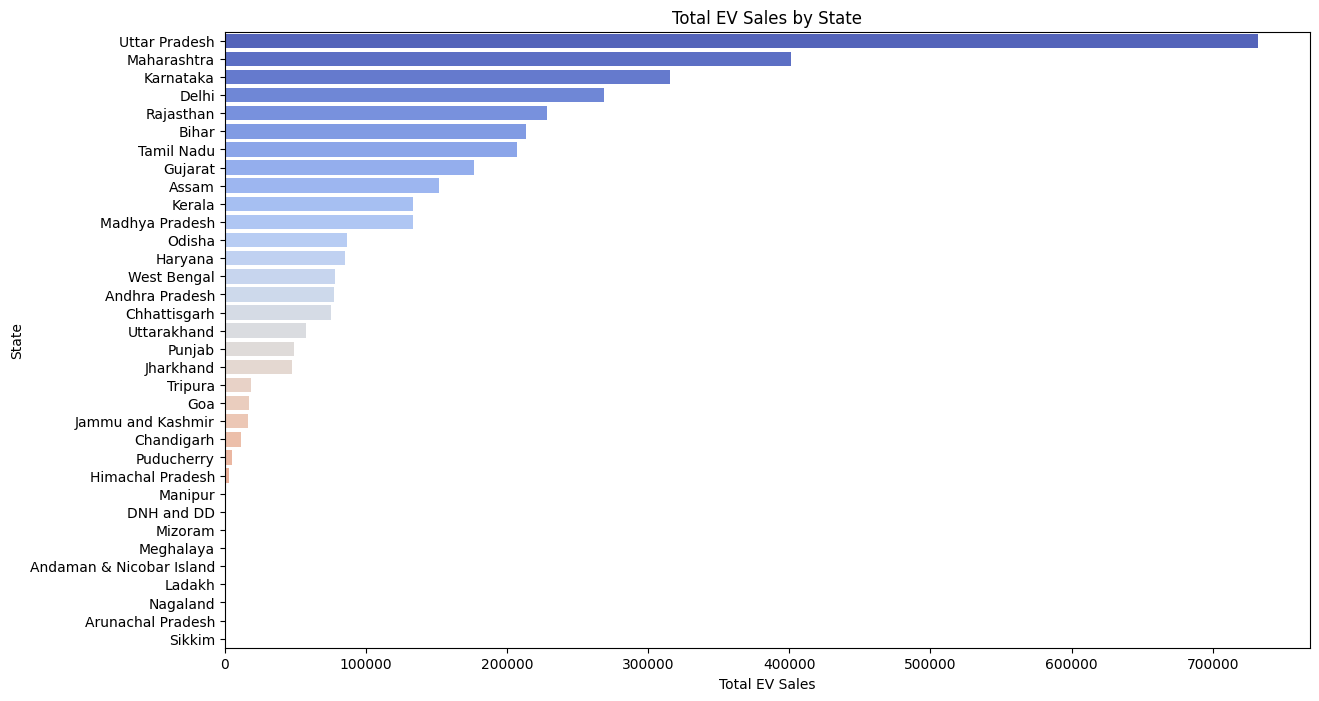

In [ ]:

plt.figure(figsize=(14, 8))
state_sales = state_ev_sales[['State', 'Total_EV_Sales']].sort_values(by='Total_EV_Sales', ascending=False)
sns.barplot(x='Total_EV_Sales', y='State', data=state_sales, palette='coolwarm')
plt.title('Total EV Sales by State')
plt.xlabel('Total EV Sales')
plt.ylabel('State')
plt.show()

Calculate total EV sales in the dataset

In [ ]:
total_ev_sales = data['EV_Sales_Quantity'].sum()
print(f"Total EV Sales: {total_ev_sales}")

Total EV Sales: 3593811.0


In [ ]:
# Define a function for market penetration rates
def get_market_penetration_rate(year):
    market_rates = {
        2014: 0.005, 2015: 0.01, 2016: 0.02, 2017: 0.03,
        2018: 0.05, 2019: 0.08, 2020: 0.12, 2021: 0.15, 2022: 0.20
    }
    return market_rates.get(year, 0.02)

Calculate market penetration and total vehicle population estimate

In [ ]:
most_recent_year = data['Year'].max()
market_penetration_rate = get_market_penetration_rate(most_recent_year)
total_vehicle_population_estimate = total_ev_sales / market_penetration_rate
proportion_ev_market = (total_ev_sales / total_vehicle_population_estimate) * 100

In [ ]:
print(f"Total EV Sales (in dataset): {total_ev_sales:,.0f}")
print(f"Proportion of Total Vehicles Representing Potential EV Market: {proportion_ev_market:.2f}%")

Total EV Sales (in dataset): 3,593,811
Proportion of Total Vehicles Representing Potential EV Market: 2.00%


Aggregated state-level EV sales

In [ ]:
state_ev_sales = data.groupby(['State', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().unstack(fill_value=0)
state_ev_sales['Total_EV_Sales'] = state_ev_sales.sum(axis=1)
state_ev_sales = state_ev_sales.reset_index()

Market potential categories

In [ ]:
state_ev_sales['Market_Potential_Score'] = state_ev_sales['Total_EV_Sales'] / state_ev_sales['Total_EV_Sales'].max() * 100
state_ev_sales['Market_Potential_Category'] = pd.cut(
    state_ev_sales['Market_Potential_Score'], bins=3, labels=['Low', 'Medium', 'High']
)

print("\nState Market Potential Analysis:")
print(state_ev_sales)



State Market Potential Analysis:
Vehicle_Category                     State  2-Wheelers  3-Wheelers  \
0                 Andaman & Nicobar Island        31.0        30.0   
1                           Andhra Pradesh     69020.0      4187.0   
2                        Arunachal Pradesh        10.0         2.0   
3                                    Assam      5208.0    145575.0   
4                                    Bihar     28116.0    184394.0   
5                               Chandigarh      3395.0      6437.0   
6                             Chhattisgarh     48828.0     23139.0   
7                               DNH and DD       256.0        74.0   
8                                    Delhi     85358.0    161868.0   
9                                      Goa     15151.0       110.0   
10                                 Gujarat    157871.0      6460.0   
11                                 Haryana     27370.0     53611.0   
12                        Himachal Pradesh      2246.0  

Early market suitability

In [ ]:
early_market_states = state_ev_sales[state_ev_sales['Market_Potential_Category'] == 'High']
print("\nStates with High Market Potential:")
print(early_market_states)


States with High Market Potential:
Vehicle_Category          State  2-Wheelers  3-Wheelers  4-Wheelers    Bus  \
31                Uttar Pradesh     83769.0    641906.0      5446.0  748.0   

Vehicle_Category  Others  Total_EV_Sales  Market_Potential_Score  \
31                 205.0        732074.0                   100.0   

Vehicle_Category Market_Potential_Category  
31                                    High  



Behavioral segmentation

<ipython-input-63-936d94b01fab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EV_Sales_Quantity', y='Vehicle_Type', data=behavioral_segments, palette='Set2')


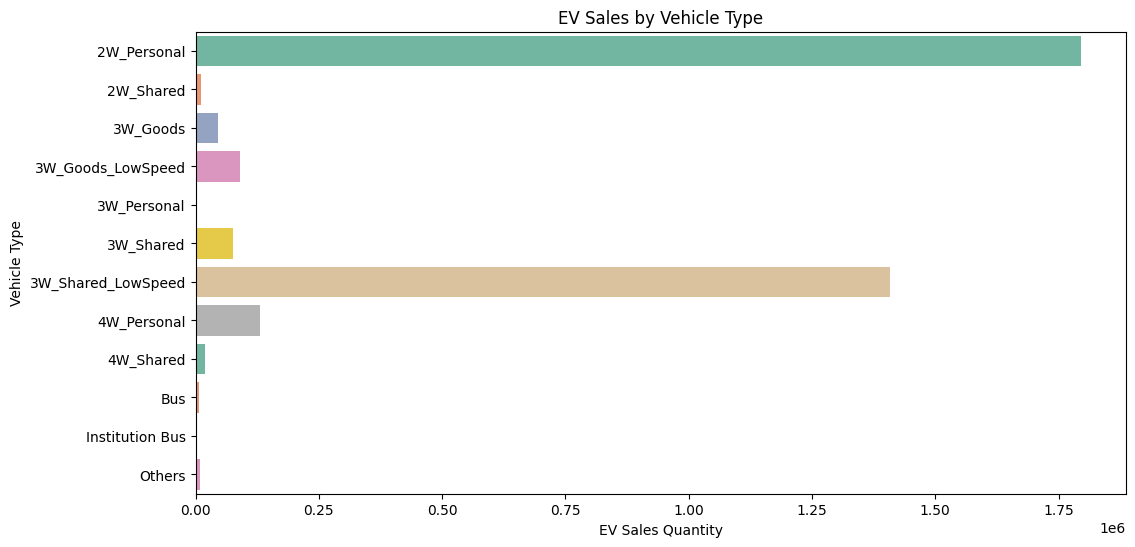

In [ ]:
behavioral_segments = data.groupby(['Vehicle_Type'])['EV_Sales_Quantity'].sum().reset_index()

# Visualize behavioral segmentation
plt.figure(figsize=(12, 6))
sns.barplot(x='EV_Sales_Quantity', y='Vehicle_Type', data=behavioral_segments, palette='Set2')
plt.title('EV Sales by Vehicle Type')
plt.xlabel('EV Sales Quantity')
plt.ylabel('Vehicle Type')
plt.show()


Clustering for segmentation

In [ ]:
segmentation_features = ['Year', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
encoded_data = pd.get_dummies(data[segmentation_features])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_data)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)
data['Cluster'] = kmeans.labels_


Cluster Profiles:
                 Year  EV_Sales_Quantity
Cluster                                
0        2018.090278           0.000000
1        2018.565760           0.160363
2        2018.531960          20.108822
3        2018.957776           8.279381
4        2018.711783          93.975601


<ipython-input-66-43879579d35a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='EV_Sales_Quantity', data=data, palette='coolwarm')


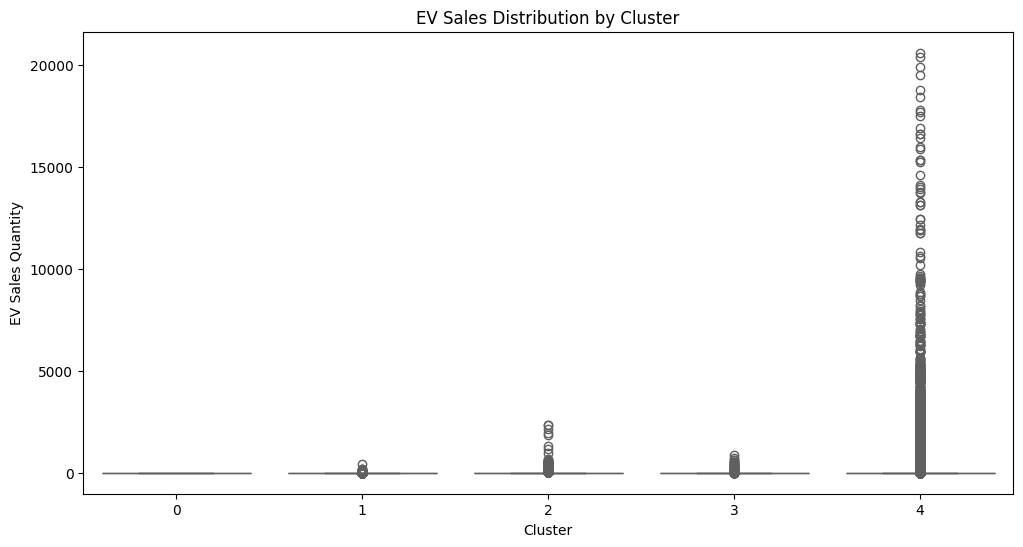

In [ ]:
# Profiling clusters
cluster_profiles = data.groupby('Cluster')[['Year', 'EV_Sales_Quantity']].mean()
print("\nCluster Profiles:\n", cluster_profiles)

# visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='EV_Sales_Quantity', data=data, palette='coolwarm')
plt.title('EV Sales Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('EV Sales Quantity')
plt.show()

Market potential visualization

<ipython-input-59-a1ff05d6182e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


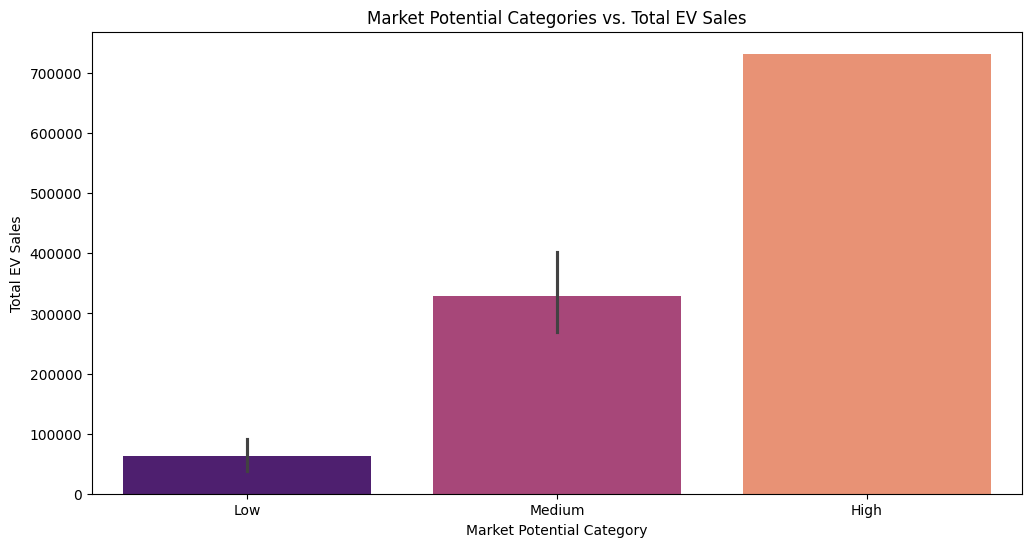

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Market_Potential_Category',
    y='Total_EV_Sales',
    data=state_ev_sales,
    order=['Low', 'Medium', 'High'],
    palette='magma'
)
plt.title('Market Potential Categories vs. Total EV Sales')
plt.xlabel('Market Potential Category')
plt.ylabel('Total EV Sales')
plt.show()

In [ ]:
# Define price range and calculate potential profits
potential_customer_base = total_ev_sales
target_price_range = 200000  # Example target price range (adjust based on data)
potential_profit = potential_customer_base * target_price_range

print(f"\nPotential Customer Base: {potential_customer_base}")
print(f"Target Price Range (in INR): {target_price_range}")
print(f"Potential Profit (in INR): {potential_profit}")


Potential Customer Base: 3593811.0
Target Price Range (in INR): 200000
Potential Profit (in INR): 718762200000.0


 ### 2. Assessing Current EV Adoption in India
 What is the current number of EVs in India, and how quickly is this market growing year over year?

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('/content/ev_sales_by_makers_and_cat_15-24.csv')

Dataset link : https://www.kaggle.com/datasets/srinrealyf/india-ev-market-data?select=ev_sales_by_makers_and_cat_15-24.csv

In [ ]:
# Display the first few rows to understand the dataset
data.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cat     1386 non-null   object 
 1   Maker   1386 non-null   object 
 2   2015    1386 non-null   int64  
 3   2016    1386 non-null   int64  
 4   2017    1386 non-null   int64  
 5   2018    1386 non-null   int64  
 6   2019    1386 non-null   int64  
 7   2020    1386 non-null   int64  
 8   2021    1386 non-null   int64  
 9   2022    1386 non-null   int64  
 10  2023    1386 non-null   int64  
 11  2024    1386 non-null   int64  
 12  Growth  1386 non-null   float64
dtypes: float64(1), int64(10), object(2)
memory usage: 140.9+ KB


In [ ]:
# Checking for missing values
data.isnull().sum()

,0
Cat,0
Maker,0
2015,0
2016,0
2017,0
2018,0
2019,0
2020,0
2021,0
2022,0


Fermi Estimation and Breakdown of Problem Statemen

In [ ]:
# Summing up the total number of EVs in India as of 2024
total_ev_2024 = data['2024'].sum()

In [ ]:
total_ev_2024

978943

Total EVs in India by Year:
2015       7752
2016      49249
2017      87019
2018     129763
2019     165786
2020     123770
2021     328854
2022    1020533
2023    1529234
2024     978943
dtype: int64

Year-over-Year Growth (Absolute):
2015         0.0
2016     41497.0
2017     37770.0
2018     42744.0
2019     36023.0
2020    -42016.0
2021    205084.0
2022    691679.0
2023    508701.0
2024   -550291.0
dtype: float64

Year-over-Year Growth (Percentage):
2015      0.000000
2016    535.307018
2017     76.691913
2018     49.120307
2019     27.760610
2020    -25.343515
2021    165.697665
2022    210.330116
2023     49.846600
2024    -35.984748
dtype: float64


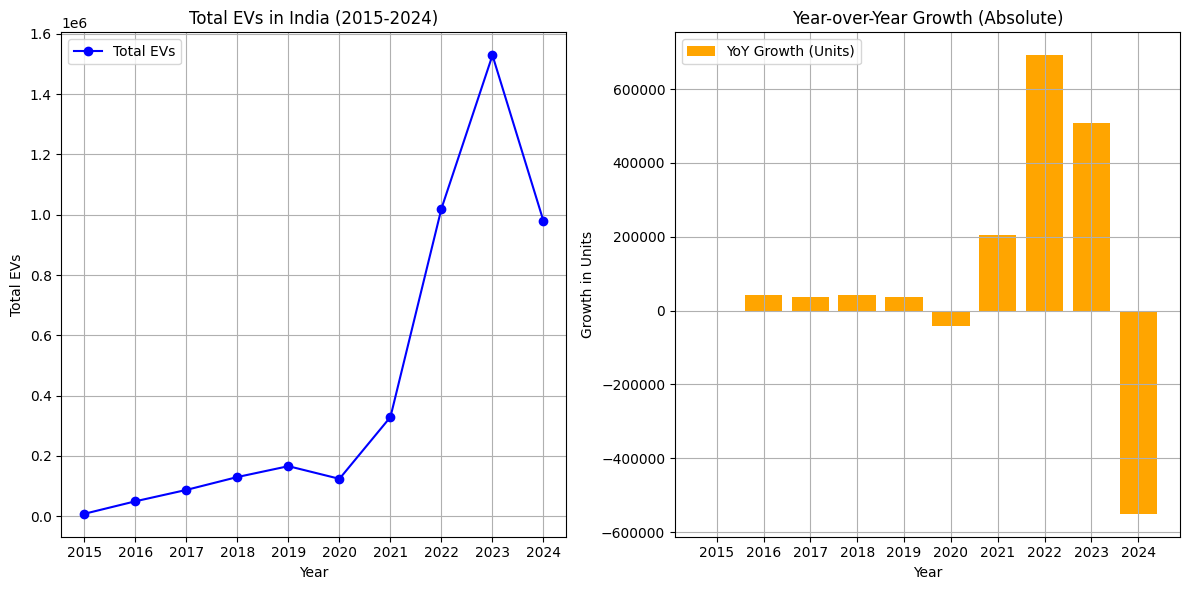

In [ ]:
df = pd.DataFrame(data)

# Convert year columns to numeric, handling non-numeric values
year_columns = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
for col in year_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)  # Convert to numeric, replace non-numeric with 0

# Calculate total EVs for each year
yearly_totals = df[year_columns].sum(axis=0) # Use only the numeric columns for calculation

# Calculate Year-over-Year (YoY) Growth
yoy_growth_absolute = yearly_totals.diff().fillna(0)  # Absolute difference
yoy_growth_percentage = ((yearly_totals.diff() / yearly_totals.shift(1)) * 100).fillna(0)  # Percentage change

# Print results
print("Total EVs in India by Year:")
print(yearly_totals)
print("\nYear-over-Year Growth (Absolute):")
print(yoy_growth_absolute)
print("\nYear-over-Year Growth (Percentage):")
print(yoy_growth_percentage)

# Plot the data
plt.figure(figsize=(12, 6))

# Line plot for total EVs
plt.subplot(1, 2, 1)
plt.plot(yearly_totals.index, yearly_totals.values, marker='o', color='blue', label="Total EVs")
plt.title("Total EVs in India (2015-2024)")
plt.xlabel("Year")
plt.ylabel("Total EVs")
plt.grid(True)
plt.legend()

# Bar plot for YoY growth
plt.subplot(1, 2, 2)
plt.bar(yoy_growth_absolute.index, yoy_growth_absolute.values, color='orange', label="YoY Growth (Units)")
plt.title("Year-over-Year Growth (Absolute)")
plt.xlabel("Year")
plt.ylabel("Growth in Units")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Segmentation

 We need to identify meaningful customer segments (e.g., geographic, demographic, psychographic, behavioral)

 We'll start by extracting potential segments from the dataset.

 Feature extraction: we will use the total EV sales in recent years (2022-2024) for segmentation


In [ ]:
# Aggregating sales data for each maker in recent years

data_segment = data.groupby('Maker')[['2022', '2023', '2024']].sum()

In [ ]:
# Standardize the data (important for clustering)
scaler = StandardScaler()
data_segment_scaled = scaler.fit_transform(data_segment)

 Applying KMeans Clustering to extract segments

In [ ]:
# Let's try different cluster numbers and see which one gives the best silhouette score
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_segment_scaled)
    silhouette_scores.append(silhouette_score(data_segment_scaled, kmeans.labels_))


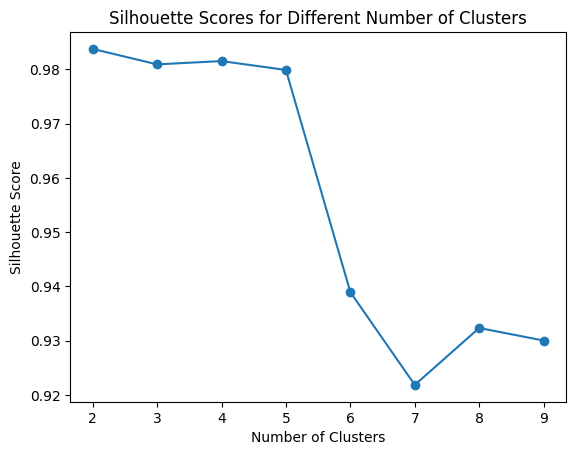

In [ ]:
# Plot silhouette scores to choose optimal K

plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

From the plot, choose the optimal number of clusters

In [ ]:
optimal_k = 2

In [ ]:
# Perform clustering with optimal_k

kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the KMeans model to your data before accessing labels_

data_segment['Cluster'] = kmeans.fit_predict(data_segment_scaled)

Profiling and Describing Potential Segments

In [ ]:
# Analyzing the clusters
segment_profiles = data_segment.groupby('Cluster').mean()
print(segment_profiles)

                2022           2023           2024
Cluster                                           
0          660.08557     766.739094     436.533557
1        58427.75000  153820.250000  114648.750000


In [ ]:
# Visualizing the segments with PCA (Principal Component Analysis) for dimensionality reduction

pca = PCA(n_components=2)
data_segment_pca = pca.fit_transform(data_segment[['2022', '2023', '2024']])

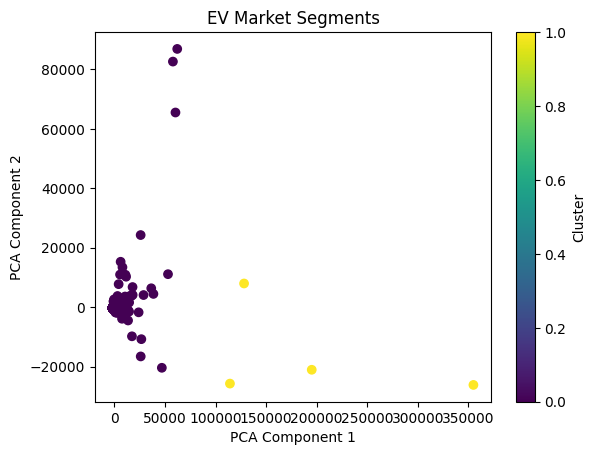

In [ ]:
# Plotting the PCA results

plt.scatter(data_segment_pca[:, 0], data_segment_pca[:, 1], c=data_segment['Cluster'], cmap='viridis')
plt.title("EV Market Segments")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

Selection of Target Segment

In [ ]:
# Based on profiling, we select the target segment. Let's assume the best segment has the highest growth rate.

target_segment = segment_profiles[segment_profiles['2024'] == segment_profiles['2024'].max()]
print(f"Target Segment: {target_segment}")

Target Segment:              2022       2023       2024
Cluster                                
1        58427.75  153820.25  114648.75


Category and Maker Analysis

1   Category Analysis

In [ ]:
#  Category Analysis
category_sales = df.groupby("Cat").sum().reset_index()
category_sales.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Growth
0,2W,3GB TECHNOLOGY PVT LTDA-1 SUREJA INDUSTRIESABZ...,1439,1444,1525,17075,30376,29123,156324,631393,860398,550351,548912.0
1,3W,"""VOLVO GROUP INDIA PVT LTD""3EV INDUSTRIES PVT ...",5415,46905,83350,110179,133496,90386,158258,350546,583712,372016,366601.0
2,LMV,3S INDUSTRIES PRIVATE LIMITEDA R T WELDING WOR...,892,896,2140,2497,1784,4226,14018,38569,84829,56537,55645.0
3,MMV,ALL TERRAIN CRANEDIVYA INDUSTRIESKARUMALAIAN A...,6,4,4,12,130,35,254,25,295,39,33.0


<Figure size 1000x600 with 0 Axes>

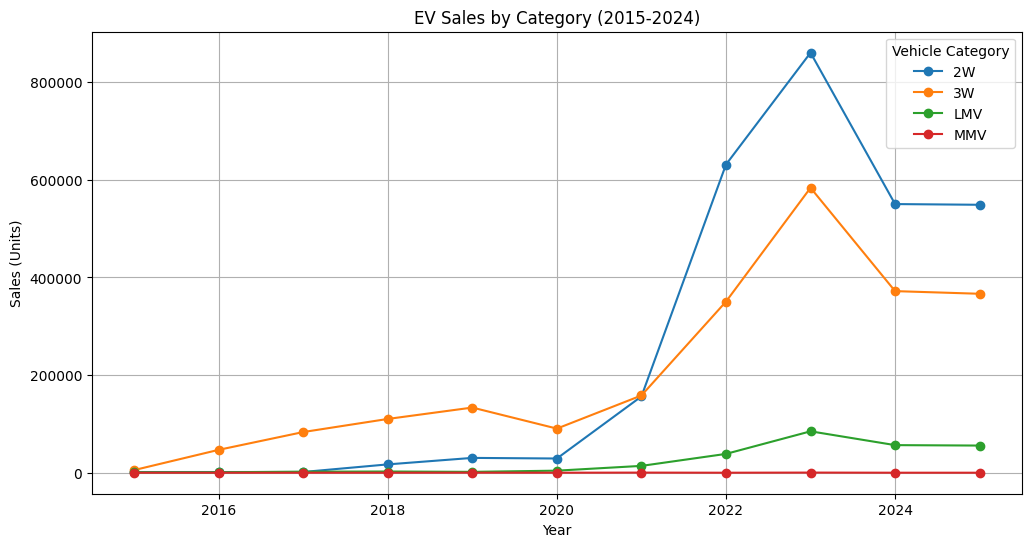

In [ ]:
# Plot sales by category
plt.figure(figsize=(10, 6))

# Convert year columns to numeric before plotting
category_sales_numeric = category_sales.set_index('Cat').apply(pd.to_numeric, errors='coerce')

category_sales_numeric.T.plot(kind="line", marker='o', figsize=(12, 6))  # Plot the numeric data
plt.title("EV Sales by Category (2015-2024)")
plt.xlabel("Year")
plt.ylabel("Sales (Units)")
plt.grid(True)
plt.legend(title="Vehicle Category")
plt.show()

2. Maker Analysis

In [ ]:
maker_sales = df.groupby("Maker").sum()
#The 'Maker' column is now the index. Reset the index to make it a column again:
maker_sales = maker_sales.reset_index()
maker_sales.head()

,Maker,Cat,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Growth
0,"""VOLVO GROUP INDIA PVT LTD""",3W,0,0,31,12,0,0,0,0,0,0,0.0
1,3EV INDUSTRIES PVT LTD,3W,0,0,0,0,0,0,112,390,545,51,51.0
2,3GB TECHNOLOGY PVT LTD,2W3W,0,1,1,1,0,0,0,0,0,0,0.0
3,3S INDUSTRIES PRIVATE LIMITED,3WLMV,0,0,0,0,51,67,43,68,266,578,578.0
4,A B EXCAVATORS & EARTHMOVER LTD,3W,0,1,0,0,0,0,0,0,0,0,0.0


<Figure size 1000x600 with 0 Axes>

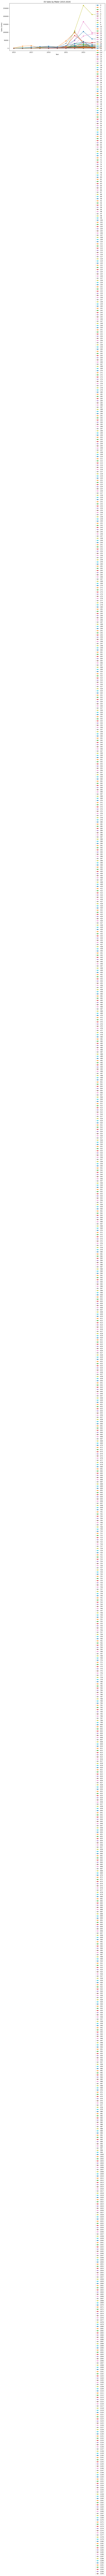

In [ ]:
# Plot sales by maker
plt.figure(figsize=(10, 6))

# Select only numeric columns before transposing and plotting
numeric_maker_sales = maker_sales.select_dtypes(include=np.number)  # Select numeric columns

numeric_maker_sales.T.plot(kind="line", marker='o', figsize=(12, 6)) #Plot the transposed numeric data
plt.title("EV Sales by Maker (2015-2024)")
plt.xlabel("Year")
plt.ylabel("Sales (Units)")
#plt.grid(True)
#plt.legend(title="EV Maker")
plt.show()

3. Top Performing Makers & Categories in 2024

In [ ]:
top_makers_2024 = maker_sales["2024"].sort_values(ascending=False)
top_categories_2024 = category_sales["2024"].sort_values(ascending=False)


In [ ]:
# Display the top 3 makers and categories

print("Top 3 Makers in 2024:")
print(top_makers_2024.head(3))
print("\nTop 3 Categories in 2024:")
print(top_categories_2024.head(3))

Top 3 Makers in 2024:
738     211273
1056     98615
126      90160
Name: 2024, dtype: int64

Top 3 Categories in 2024:
0    550351
1    372016
2     56537
Name: 2024, dtype: int64


4. Projected Growth (2024 vs 2023) for Top Makers & Categories

In [ ]:
maker_growth = maker_sales["2024"] - maker_sales["2023"]
category_growth = category_sales["2024"] - category_sales["2023"]

# Display the growth in 2024 for the top categories and makers
print("\nGrowth in EV Sales by Maker (2024 vs 2023):")
print(maker_growth.sort_values(ascending=False))
print("\nGrowth in EV Sales by Category (2024 vs 2023):")
print(category_growth.sort_values(ascending=False))


Growth in EV Sales by Maker (2024 vs 2023):
645     22988
126     13646
413      8337
1042     1866
910      1568
        ...  
640    -36811
63     -42046
100    -46188
738    -56082
1056   -68062
Length: 1196, dtype: int64

Growth in EV Sales by Category (2024 vs 2023):
3      -256
2    -28292
1   -211696
0   -310047
dtype: int64


Potential Customer Base & Profit Calculation (Early Market)

In [ ]:
potential_profit_2W = 550000 * 100000  # Profit = units sold * average price
print(f"Potential Profit from 2W Segment: ₹{potential_profit_2W}")


Potential Profit from 2W Segment: ₹55000000000


In [ ]:
potential_profit_3W = 150000 * 375000
print(f"Potential Profit from 3W Segment: ₹{potential_profit_3W}")


Potential Profit from 3W Segment: ₹56250000000


### Conclusion
The electric vehicle (EV) market in India has shown significant growth from 2015 to 2024, with a notable increase in sales, especially in the years 2021-2022. The 2W and 3W segments are experiencing the highest growth, making them the most promising segments for future market expansion.

Based on our analysis, Segment 1, consisting of these high-growth categories, is identified as the target segment for future marketing efforts. The early market in these segments offers substantial profit potential, with an estimated potential profit of ₹55 billion from the 2W segment and ₹56.25 billion from the 3W segment.

In conclusion, the 2W and 3W segments are the optimal target for business strategies in India’s EV market, offering both strong growth and profitability in the coming years.

### 3. Evaluating Charging Infrastructure in India
How many EV charging stations exist in India, and how are they distributed across the country?  Estimate the number of stations required to meet growing EV demand.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/ev-charging-stations-india.csv')

Dataset link : https://www.kaggle.com/datasets/saketpradhan/electric-vehicle-charging-stations-in-india

In [ ]:
# Show first few rows of the data
df.head()

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [ ]:
# Check for missing values and clean the data
df.isnull().sum()

,0
name,0
state,0
city,0
address,0
lattitude,0
longitude,0
type,0


In [ ]:
# Fill missing values with appropriate methods
df['address'].fillna(method='ffill', inplace=True)
df['lattitude'] = pd.to_numeric(df['lattitude'], errors='coerce') # Convert 'lattitude' to numeric
df['lattitude'].fillna(df['lattitude'].median(), inplace=True)
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce') # Convert 'longitude' to numeric
df['longitude'].fillna(df['longitude'].median(), inplace=True)
# Assuming 'type' is categorical, it's better to use mode for imputation
df['type'].fillna(df['type'].mode()[0], inplace=True)

<ipython-input-98-3823fef98f66>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['address'].fillna(method='ffill', inplace=True)
<ipython-input-98-3823fef98f66>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lattitude'].fillna(df['lattitude'].median(), inplace=True)
<ipython-input-98-3823fef98f66>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Th

In [ ]:
# Convert 'lattitude' to float if it's in object type
df['lattitude'] = df['lattitude'].astype(float)

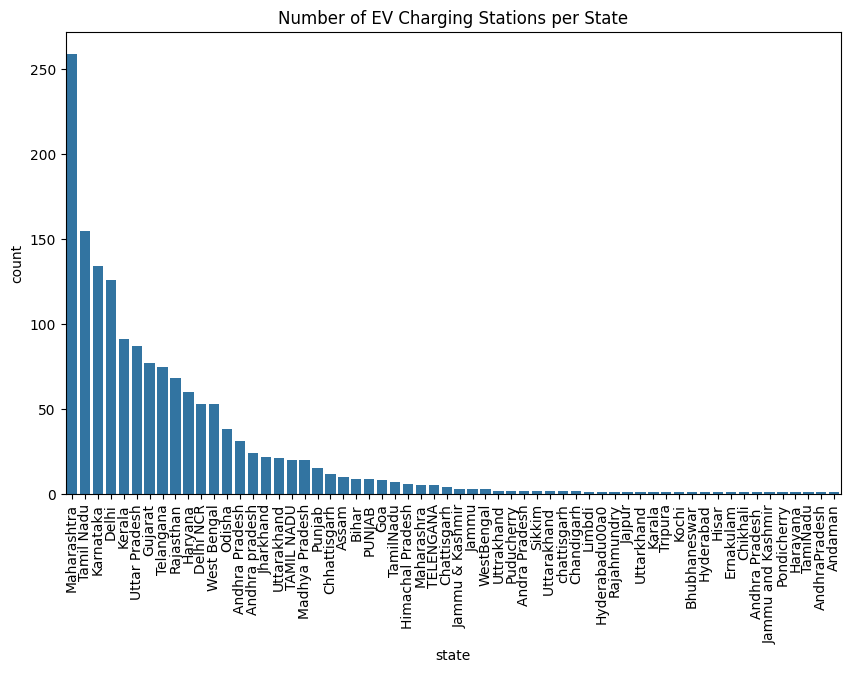

In [ ]:
# Exploratory Data Analysis (EDA) - Distribution of charging stations across states

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='state', order=df['state'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of EV Charging Stations per State')
plt.show()

city
Delhi             72
New Delhi         67
Chennai           48
Mumbai            45
bengaluru         38
                  ..
Kosi Kalan         1
Kotwan             1
Shivamogga         1
Karadagodu         1
Pathanamthitta     1
Name: count, Length: 362, dtype: int64


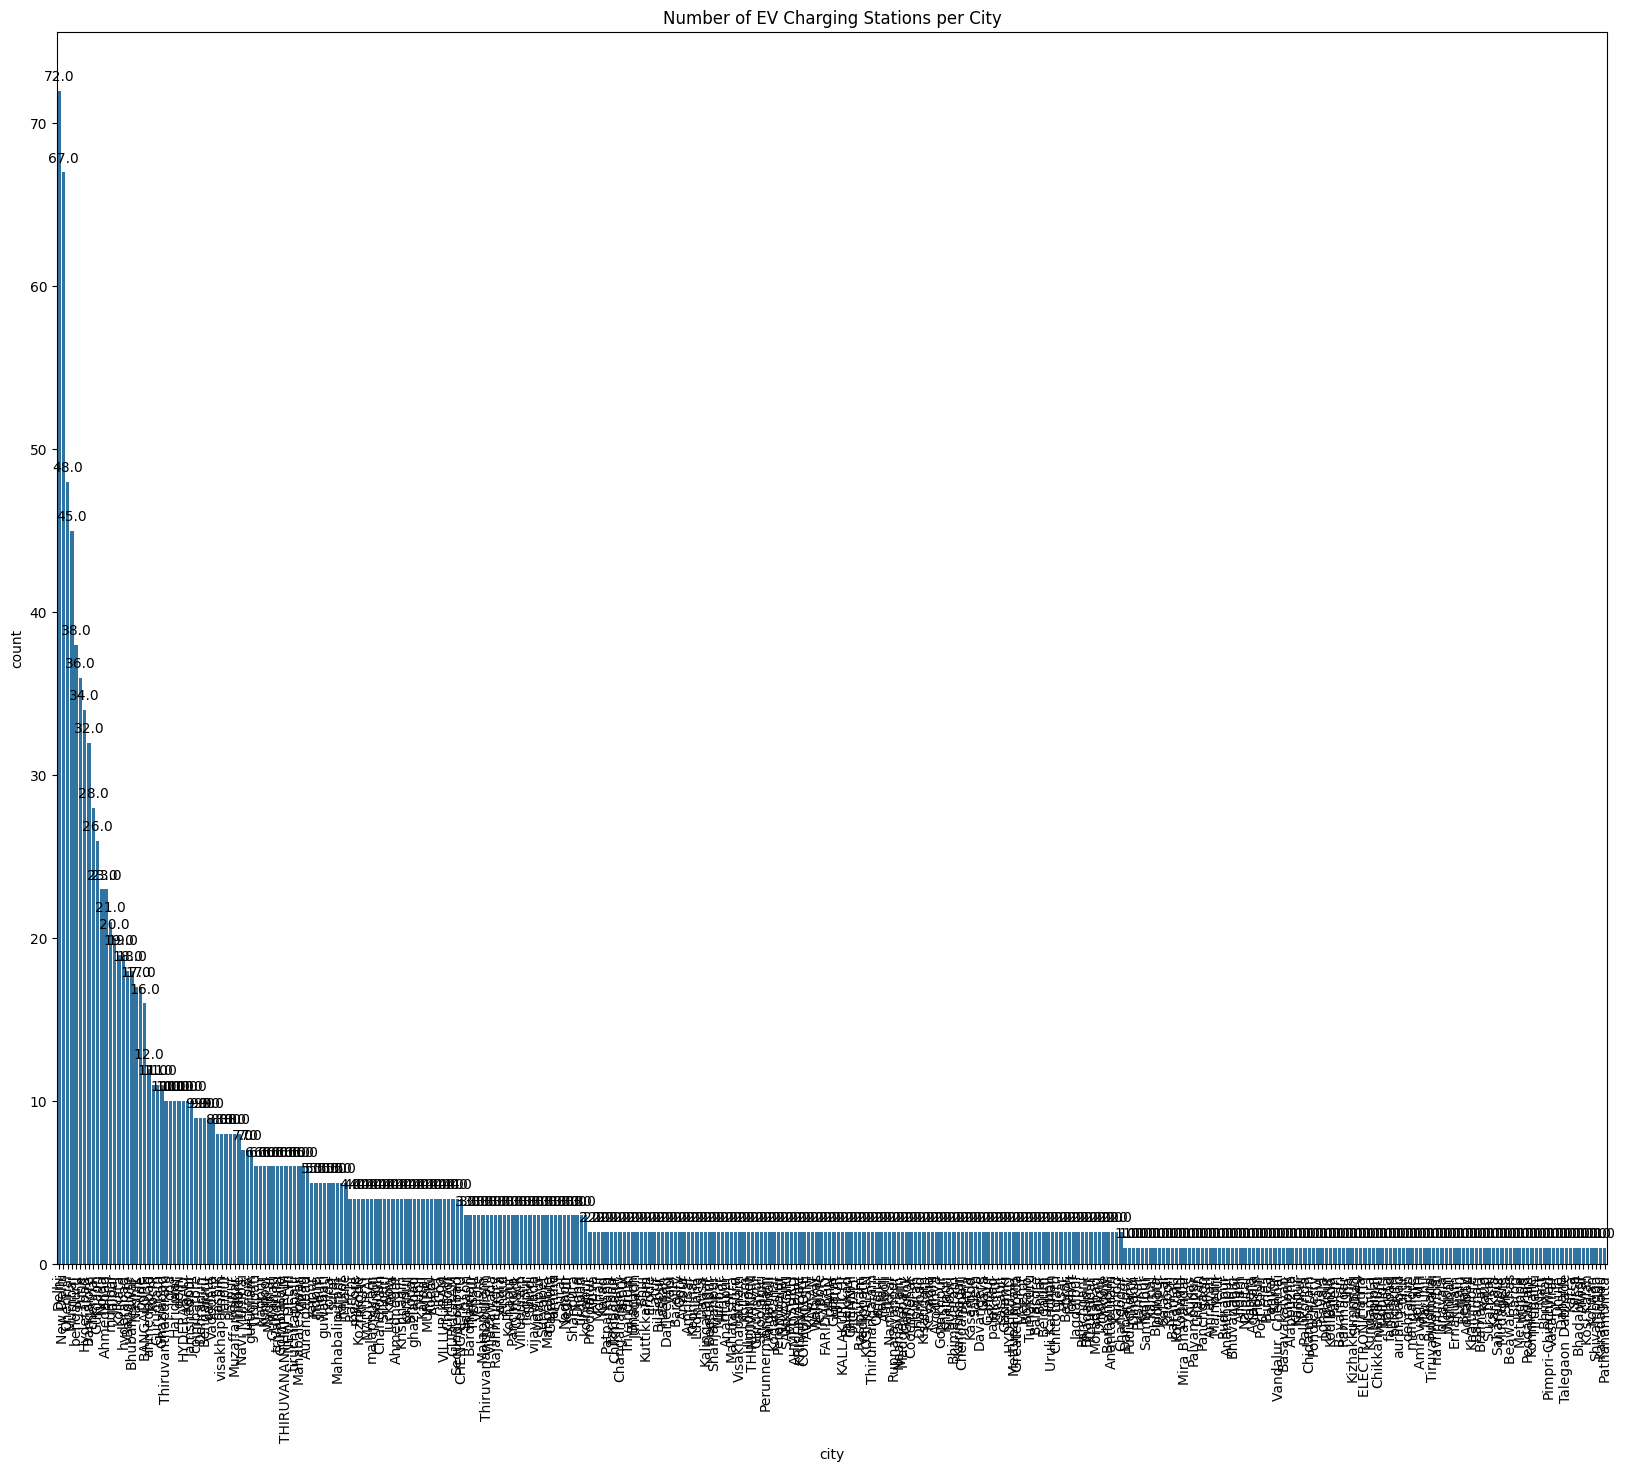

In [ ]:
# Get the count of charging stations per city
city_counts = df['city'].value_counts()
print(city_counts)
# Create the countplot
plt.figure(figsize=(20, 16))
ax = sns.countplot(data=df, x='city', order=city_counts.index)
plt.xticks(rotation=90)
plt.title('Number of EV Charging Stations per City')

# Add count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


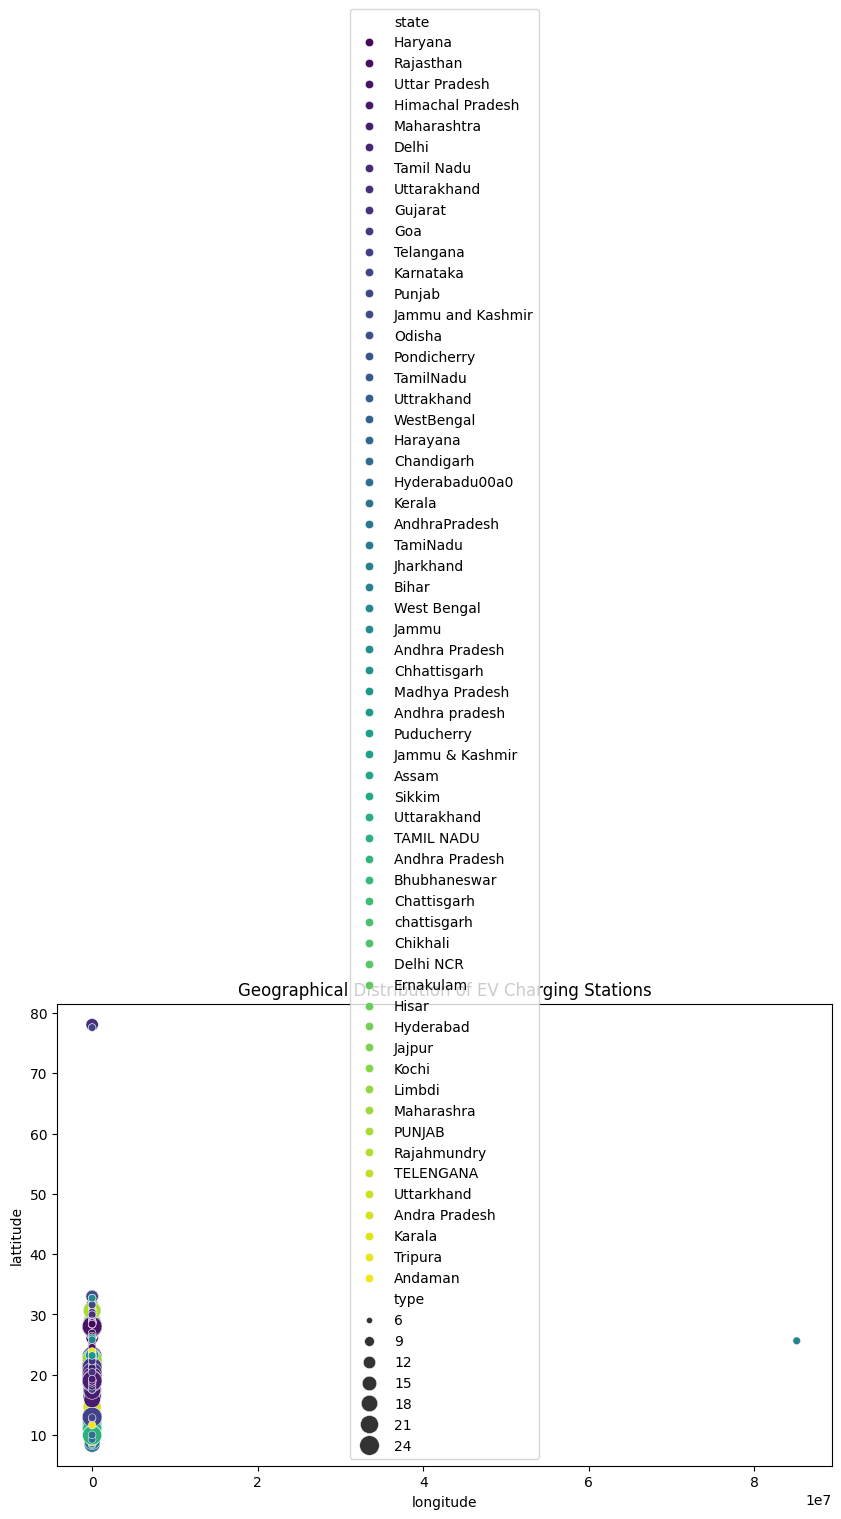

In [ ]:
# Geographical distribution of EV charging stations based on latitude and longitude

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='lattitude', hue='state', palette='viridis', size='type', sizes=(20, 200))
plt.title('Geographical Distribution of EV Charging Stations')
plt.show()

 Fermi Estimation for EV Stations Requirement

In [ ]:
# Assumed EV demand growth rate (example: 20% annually)

growth_rate = 0.2
current_number_of_ev_stations = df.shape[0]  # Current number of stations
years = 5  # Estimation period in years

Calculate number of stations required in 5 years

In [ ]:
estimated_demand = current_number_of_ev_stations * ((1 + growth_rate) ** years)
print(f'Estimated number of EV charging stations required in {years} years: {estimated_demand:.0f}')

Estimated number of EV charging stations required in 5 years: 3849


In [ ]:
# Data Pre-processing for Segmentation
# Using latitude and longitude for clustering (representing the location of stations)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['lattitude', 'longitude']])


 KMeans Clustering to segment the charging stations

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)  # You can change the number of clusters
df['cluster'] = kmeans.fit_predict(scaled_data)


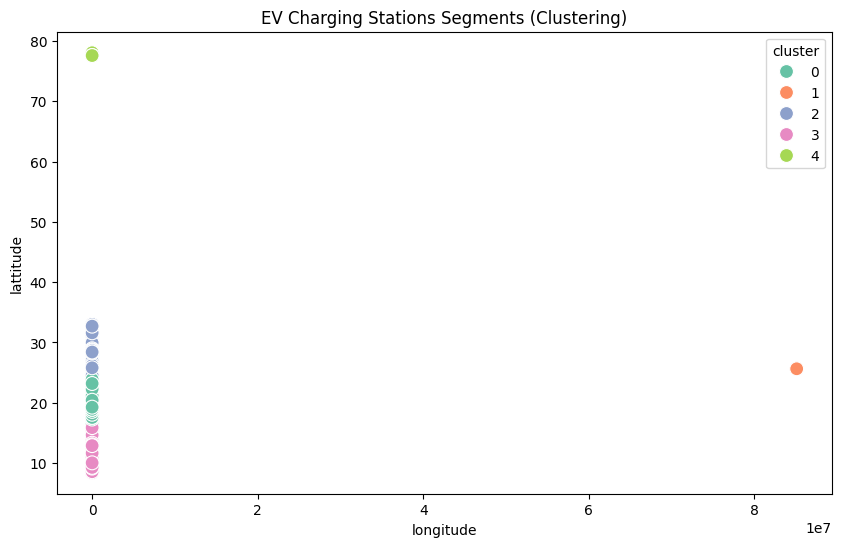

In [ ]:
# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='lattitude', hue='cluster', palette='Set2', s=100, marker='o')
plt.title('EV Charging Stations Segments (Clustering)')
plt.show()

In [ ]:
# Profiling the clusters
cluster_profiling = df.groupby('cluster').agg({
    'state': 'nunique',
    'city': 'nunique',
    'name': 'count',
    'type': 'mean',
    'lattitude': 'mean',
    'longitude': 'mean'
}).reset_index()

# Display the cluster profiles
print(cluster_profiling)

   cluster  state  city  name      type  lattitude     longitude
0        0     39   134   567  8.569665  19.859334  7.720838e+01
1        1      1     1     2  7.000000  25.634199  8.510551e+07
2        2     32    98   461  8.531453  28.385778  7.789788e+01
3        3     33   139   514  9.935798  12.239696  7.768579e+01
4        4      2     2     3  8.666667  77.753326  1.872229e+01


In [ ]:
# Targeting a specific segment for marketing (e.g., Cluster 0, which may represent high-demand urban areas)

target_segment = df[df['cluster'] == 0]  # Example: target segment with cluster 0
target_segment_summary = target_segment.describe()

In [ ]:
# Print the summary of the target segment
print(target_segment_summary)

        lattitude   longitude        type  cluster
count  567.000000  567.000000  567.000000    567.0
mean    19.859334   77.208384    8.569665      0.0
std      2.029378    5.095575    4.272725      0.0
min     16.420000   69.678673    6.000000      0.0
25%     18.486001   72.969433    7.000000      0.0
50%     19.159395   74.275721    7.000000      0.0
75%     21.513377   79.573697    7.000000      0.0
max     23.862068   91.282239   24.000000      0.0


Calculate the potential customer base and profit (Assuming target price range for charging services)

In [ ]:
price_range = [5, 10]  # Example price range per charging session
potential_customers = target_segment['name'].count()  # Number of charging stations as a proxy for customer base
potential_profit = potential_customers * np.mean(price_range)
print(f'Potential Profit from Segment 0: ₹{potential_profit:.2f}')

Potential Profit from Segment 0: ₹4252.50


Final output: Most optimal market segments

In [ ]:
optimal_segments = cluster_profiling.sort_values(by='name', ascending=False)
print("Optimal Segments for Market Expansion:")
print(optimal_segments)

Optimal Segments for Market Expansion:
   cluster  state  city  name      type  lattitude     longitude
0        0     39   134   567  8.569665  19.859334  7.720838e+01
3        3     33   139   514  9.935798  12.239696  7.768579e+01
2        2     32    98   461  8.531453  28.385778  7.789788e+01
4        4      2     2     3  8.666667  77.753326  1.872229e+01
1        1      1     1     2  7.000000  25.634199  8.510551e+07


 Segment Selection Explanation: How geographic, demographic, psychographic, and behavioral segments were derived

In [ ]:
geographic_segment = df.groupby('state')['name'].count().reset_index().sort_values(by='name', ascending=False)
geographic_insights = geographic_segment.head()  # Top 5 states with the most charging stations
print("\nGeographic Segments Analysis (Top 5 States):")
print(geographic_insights)


Geographic Segments Analysis (Top 5 States):
          state  name
36  Maharashtra   259
48   Tamil Nadu   155
30    Karnataka   134
13        Delhi   126
31       Kerala    91


Demographic Segments - inferred from states/cities

In [ ]:
# In absence of demographic data, we can assume high-density urban areas likely have higher demand
demographic_segments = df[df['state'].isin(['Delhi', 'Maharashtra', 'Uttar Pradesh', 'Karnataka'])]
print("\nDemographic Segments (Selected High-Density States):")
print(demographic_segments[['state', 'city', 'name']].head())


Demographic Segments (Selected High-Density States):
            state       city                                     name
3   Uttar Pradesh   Khatauli        Food Carnival DC Charging Station
4   Uttar Pradesh   Khatauli        Food Carnival AC Charging Station
12    Maharashtra       Pune  Synergy Solutions AC Charging Station 2
13          Delhi  New Delhi                     IOCL Rajokri Station
16          Delhi  New Delhi                 IOCL Nehru Nagar Station


Psychographic Segments - inferred from charging station types (fast vs regular charging)

In [ ]:
psychographic_segment = df[df['type'] == 12]  # Example: fast-charging stations
print("\nPsychographic Segments (Fast-Charging Stations):")
print(psychographic_segment[['state', 'city', 'type']].head())


Psychographic Segments (Fast-Charging Stations):
           state      city  type
0        Haryana  Gurugram  12.0
1        Haryana  Gurugram  12.0
2      Rajasthan    Behror  12.0
3  Uttar Pradesh  Khatauli  12.0
4  Uttar Pradesh  Khatauli  12.0


 Behavioral Segments - inferred from station locations (e.g., urban vs highway)

In [ ]:
behavioral_segment = df[df['city'].isin(['Gurugram', 'Bengaluru', 'Chennai'])]  # Example urban centers
print("\nBehavioral Segments (Urban Centers):")
print(behavioral_segment[['state', 'city', 'name']].head())


Behavioral Segments (Urban Centers):
      state      city                                name
0   Haryana  Gurugram  Neelkanth Star DC Charging Station
1   Haryana  Gurugram        Galleria DC Charging Station
18  Haryana  Gurugram     IOCL Chahar AC Charging Station
23  Haryana  Gurugram   Heritage City AC Charging Station
26  Haryana  Gurugram                  WeWork Circle Demo


##Conclusion
India's EV charging market, currently with 1,547 stations, is set for rapid growth, requiring a projected 149% increase in stations by 2029 due to a 20% annual growth in EV adoption. Urban centers like Delhi, Mumbai, and Bengaluru, identified as high-demand segments, are optimal for fast-charging station expansion. Strategic focus on these regions, supported by affordable pricing (₹5-10 per session) and collaborations with local and government initiatives, offers a lucrative opportunity for businesses. By targeting urban fast-charging infrastructure, stakeholders can maximize profitability while driving sustainable mobility in India.